Copyright (c) 2021 Python Charmers. All rights reserved. Please do not distribute.

# Day 4 - Python for Predictive Data Analytics - 2021-11-25

Good morning!

Plan for today:
- Classification - categorical
- Regression - continuous
- Tooling for machine learning
- Deployment techniques

# Classification

In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv("/Data/wine.csv")

In [3]:
wine.head()

,Cultivar,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine.shape

(178, 14)

In [11]:
wine.columns

Index(['Cultivar', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [4]:
wine['Cultivar'].unique()

array([0, 1, 2])

In [5]:
import plotly.express as px

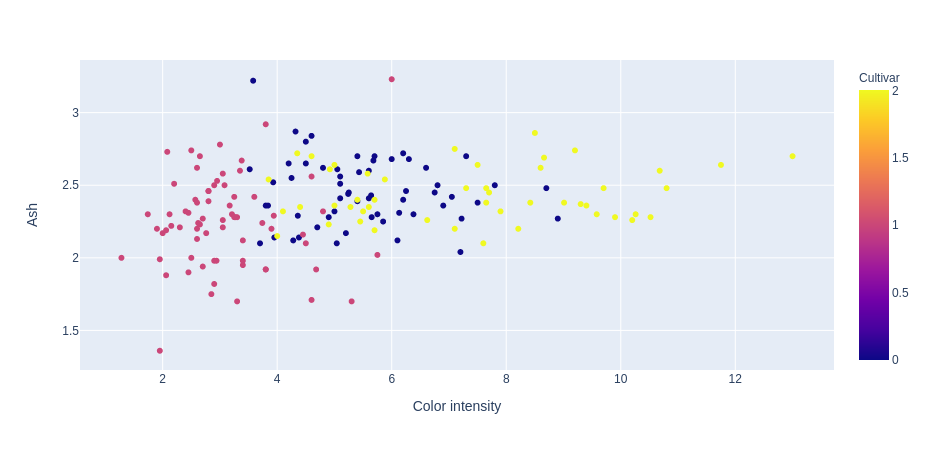

In [10]:
px.scatter(wine, x="Color intensity", y="Ash", color="Cultivar")

**Exercise: Can you find two good features that separate the classes?**

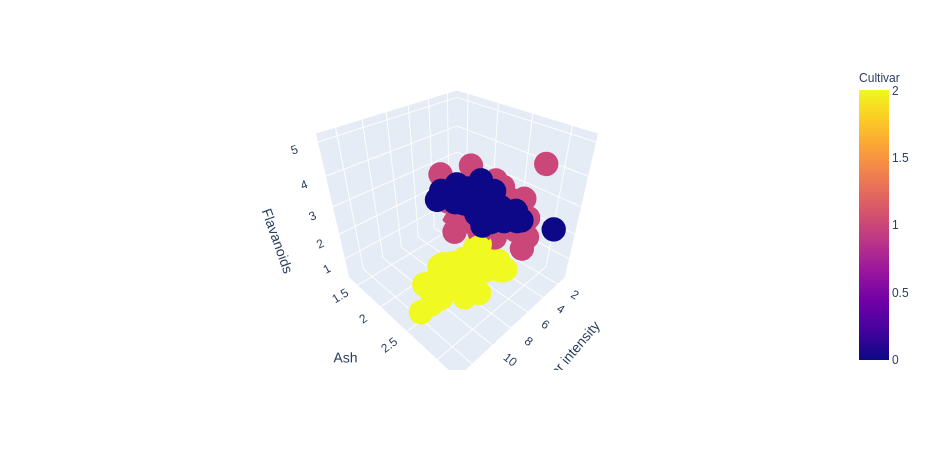

In [18]:
px.scatter_3d(wine, x="Color intensity", y="Ash", z="Flavanoids", color="Cultivar", size_max=0.2)

In [19]:
wine.shape

(178, 14)

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

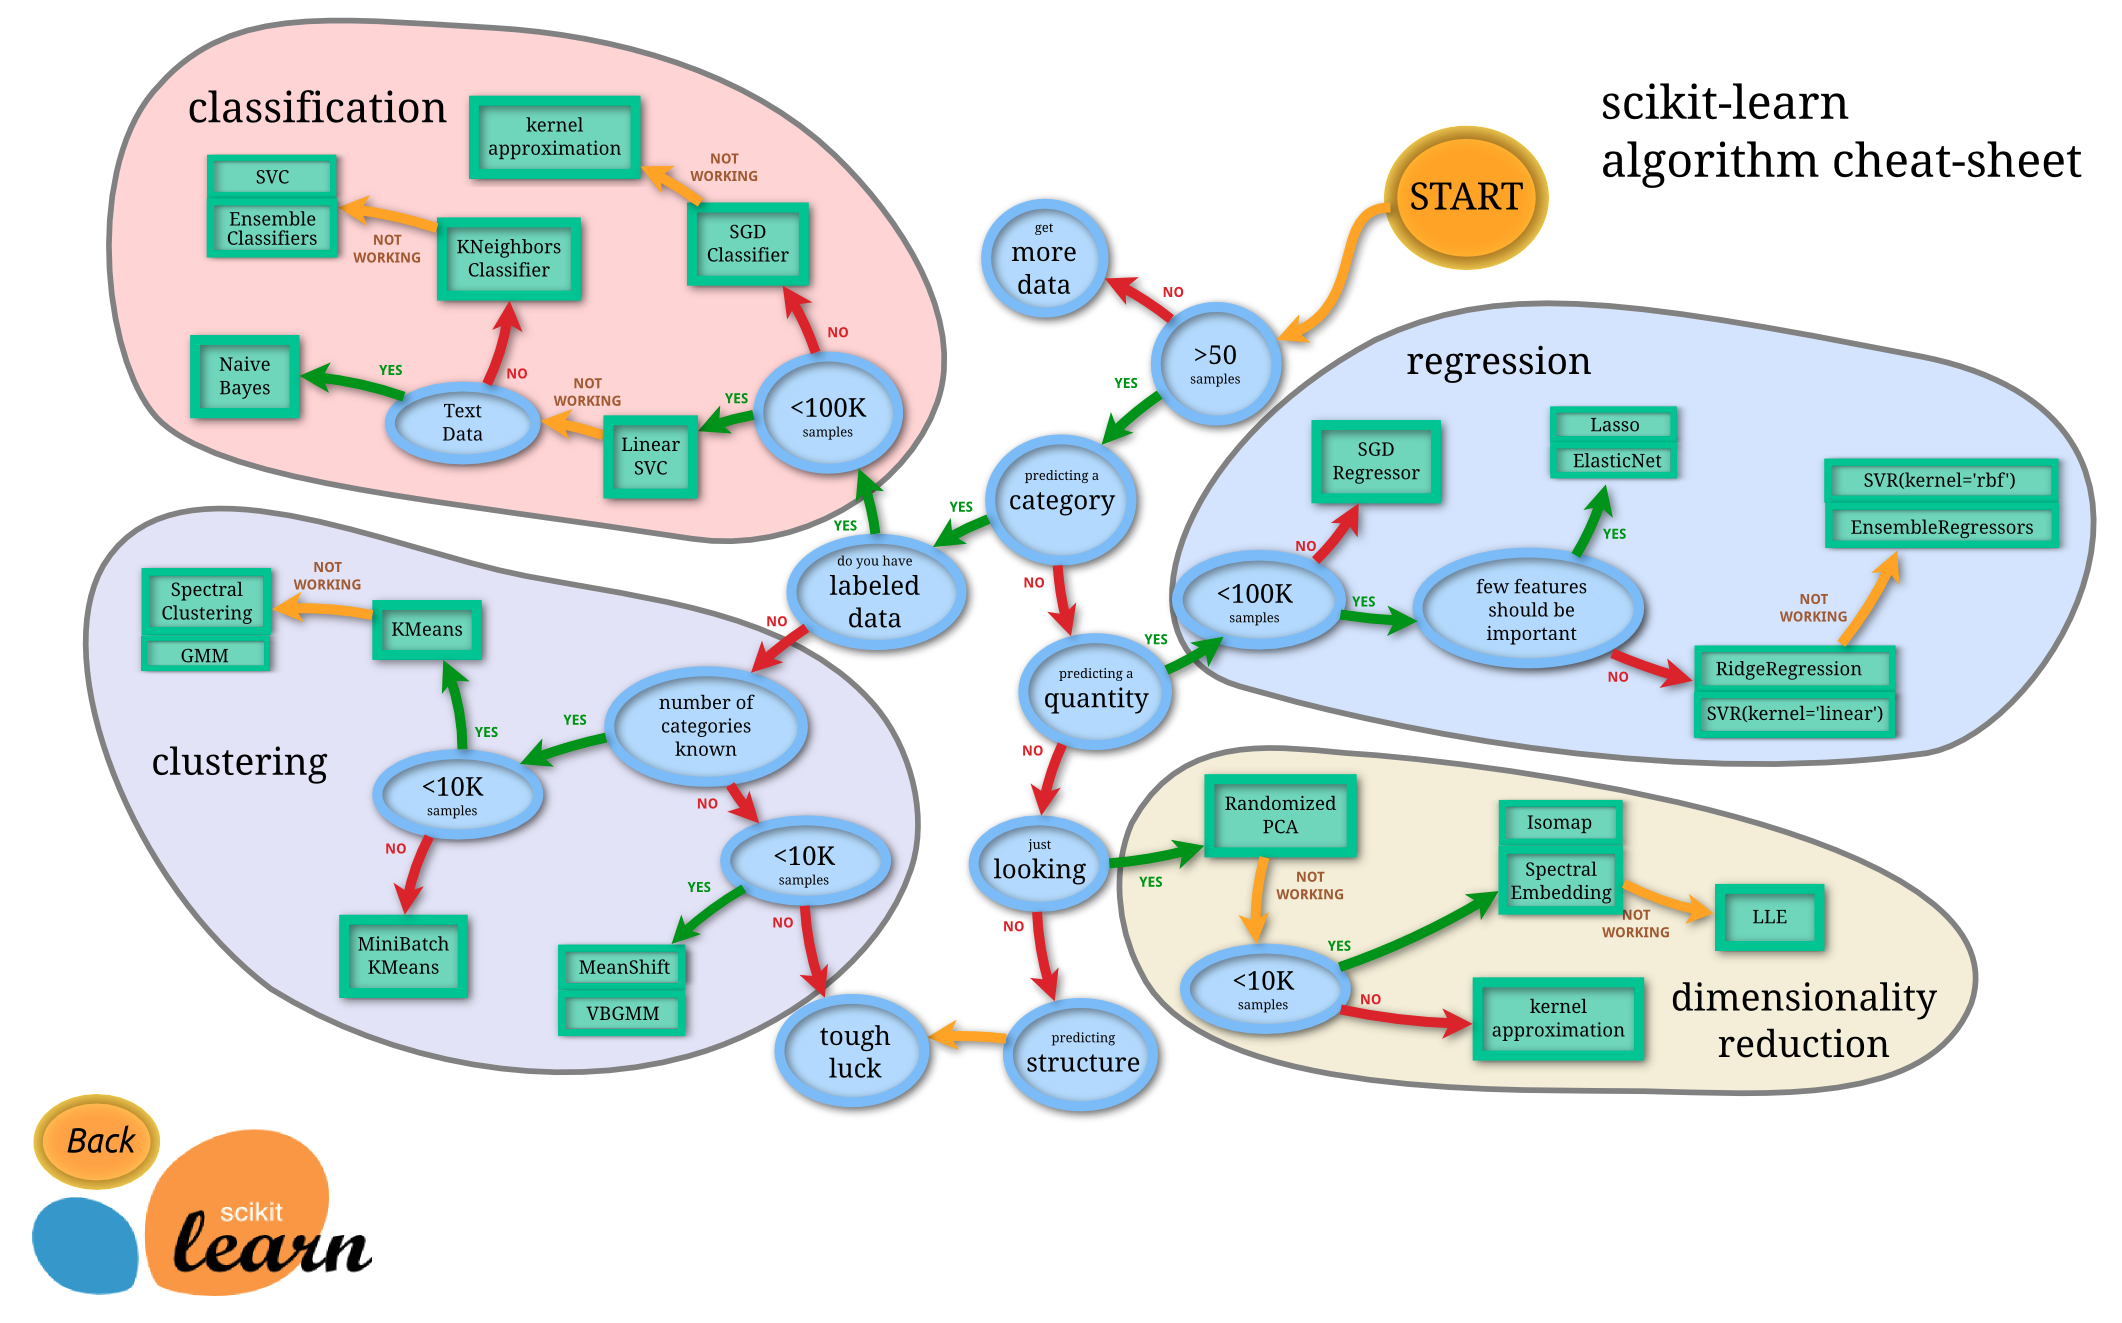

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC(kernel='linear')

In [22]:
wine.columns

Index(['Cultivar', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [23]:
# Get rid of Cultivar!
cols = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']

In [24]:
X = wine[cols]
y = wine['Cultivar']

In [25]:
model.fit(X, y)

SVC(kernel='linear')

In [26]:
y_pred = model.predict(X)

In [28]:
(y_pred == y).sum()

177

In [30]:
(y_pred == y).mean()  # Trues are 1s, Falses are 0s, so the mean is "proportion of Trues"

0.9943820224719101

### Exercise

1. Give this a go
2. Try to find a combination of just 3 features that gets a high accuracy >90%
3. Using the workflow, what algorithm should we try next if this wasn't good enough?
4. Try import that model and use it.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
model_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred_knn = model_knn.predict(X)

In [40]:
(y_pred_knn == y).mean()

1.0

# Train-test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
X_train.shape

(133, 13)

In [44]:
X_test.shape

(45, 13)

In [45]:
# SVC
model.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred_svc = model.predict(X_test)

In [47]:
(y_pred_svc == y_test).mean()

0.9555555555555556

In [49]:
# KNN n_neighors=1
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
y_pred_knn = model_knn.predict(X_test)

In [51]:
(y_pred_knn == y_test).mean()

0.7555555555555555

### Exercise

1. Perform a train test split
2. Try three different values for n_neighbors - what is the best value you found?
3. Try setting `kernel='rbf'` in the SVC model - does this improve the result?

In [53]:
type(model)

sklearn.svm._classes.SVC

In [52]:
model.get_params()  # If you forget what the model's parameters were set to

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [54]:
from sklearn.metrics import accuracy_score, classification_report

In [55]:
accuracy_score(y_test, y_pred_knn)

0.7555555555555555

In [56]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.74      0.82      0.78        17
           2       0.69      0.64      0.67        14

    accuracy                           0.76        45
   macro avg       0.76      0.75      0.75        45
weighted avg       0.76      0.76      0.75        45



If your support values are wildly different - look at "imbalanced dataset learning"

In [57]:
from sklearn.metrics import f1_score

In [58]:
f1_score(y_test, y_pred_knn, average='macro')

0.7530864197530863

### F1 score is better than accuracy - use it instead!

In [59]:
auto = pd.read_csv("/Data/Auto.csv")

In [60]:
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [61]:
auto['origin'].unique()

array([1, 3, 2])

In [62]:
y = auto['origin']

In [63]:
len(auto['name'].unique()) / len(auto['name'])

0.7678571428571429

In [64]:
auto.columns

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [65]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year']

In [66]:
X = auto[cols]

In [67]:
auto.shape

(392, 10)

# Exercise

Do some classification with this dataset:

- Train test split
- Use the workflow to choose a model
- Train only on the training data
- Evaluate only on the testing data
- Use f1 score to evaluate



# Cross fold validation

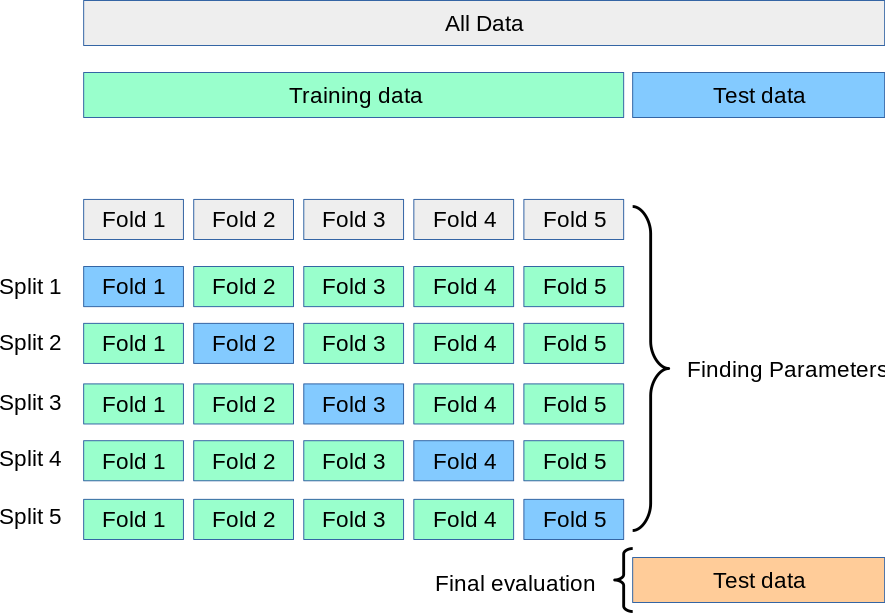

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
scores = cross_val_score(KNeighborsClassifier(), X, y)

In [70]:
scores

array([0.72151899, 0.70886076, 0.80769231, 0.74358974, 0.51282051])

In [71]:
scores.mean()

0.6988964621876015

In [72]:
scores.min(), scores.max()

(0.5128205128205128, 0.8076923076923077)

In [73]:
KNeighborsClassifier.score?

Signature: KNeighborsClassifier.score(self, X, y, sample_weight=None)
Docstring:
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True labels for X.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    Mean accuracy of self.predict(X) wrt. y.
File:      /opt/conda/lib/python3.8/site-packages/sklearn/base.py
Type:      function


In [77]:
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, average='macro')

In [80]:
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring=f1_scorer)

In [82]:
scores  # Now these are f1 scores

array([0.57055498, 0.51448804, 0.73765969, 0.60707522, 0.45276623])

### Exercise:

1. Give this a go and get a spread of estimated scores
2. Try three different models - which has the highest mean score?

Steps from here:

- Use cross fold validation on many models to choose the best one
- Fit a new model on all of your data
- Deploy that model to production

In [83]:
my_best_model = KNeighborsClassifier()
my_best_model.fit(X, y)

KNeighborsClassifier()

In [86]:
auto[cols].iloc[0].values

array([  18.,    8.,  307.,  130., 3504.,   12.,   70.])

In [88]:
import numpy as np

In [89]:
my_values = np.array([  18.,    8.,  307.,  130., 3504.,   12.,   70.])

In [90]:
my_values.shape

(7,)

In [91]:
my_values_matrix = my_values.reshape(1, -1)

In [92]:
my_values_matrix.shape

(1, 7)

In [93]:
my_best_model.predict(my_values_matrix)

array([1])

# Break until 11.10am

In [94]:
from sklearn.datasets import load_iris

iris = load_iris()

In [95]:
X = iris.data
y = iris.target

In [99]:
X.shape

(150, 4)

In [96]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


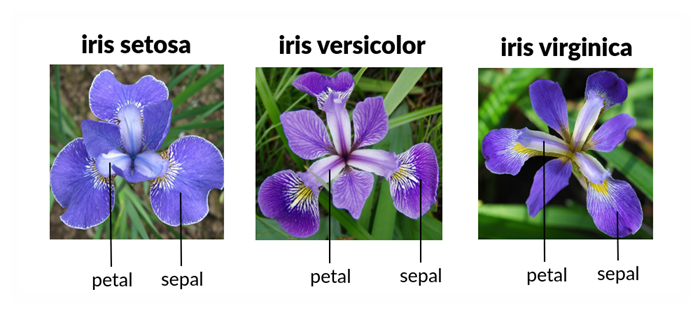

In [98]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

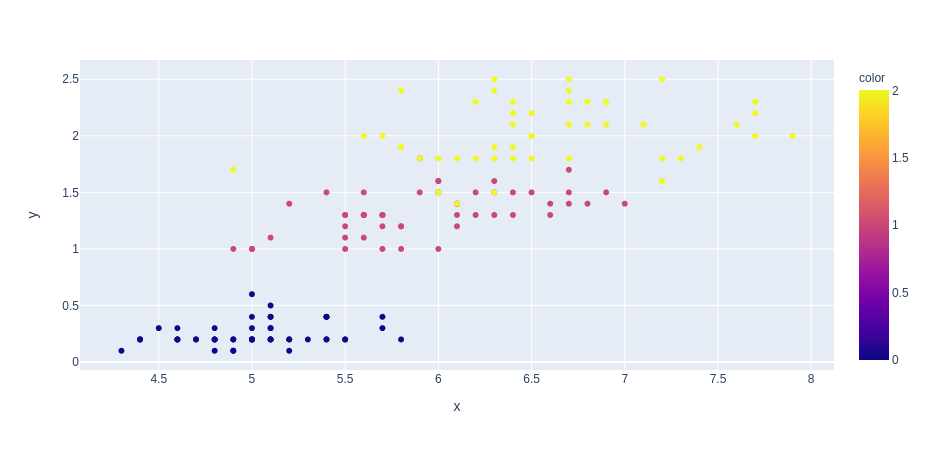

In [101]:
px.scatter(x=X[:,0], y=X[:,3], color=y)

In [102]:
cross_val_score(SVC(kernel='linear'), X, y)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [103]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [105]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
images = digits.images
y = digits.target

In [107]:
from matplotlib import pyplot as plt

Expected digit is: 1


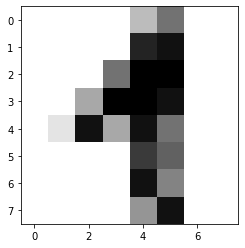

In [112]:
sample_number = 107

print(f"Expected digit is: {y[sample_number]}")
plt.imshow(images[sample_number], cmap='Greys');

In [118]:
images[sample_number,1,5]

15.0

In [117]:
images.max()

16.0

In [119]:
images.reshape(-1, 64)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [120]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

scikit-learn requires 2-D data only - rows are for individual samples, and columns are for features/attributes/variable.

Our images are 3-D. We have "rows" for samples, and each image is rows/columns of pixels

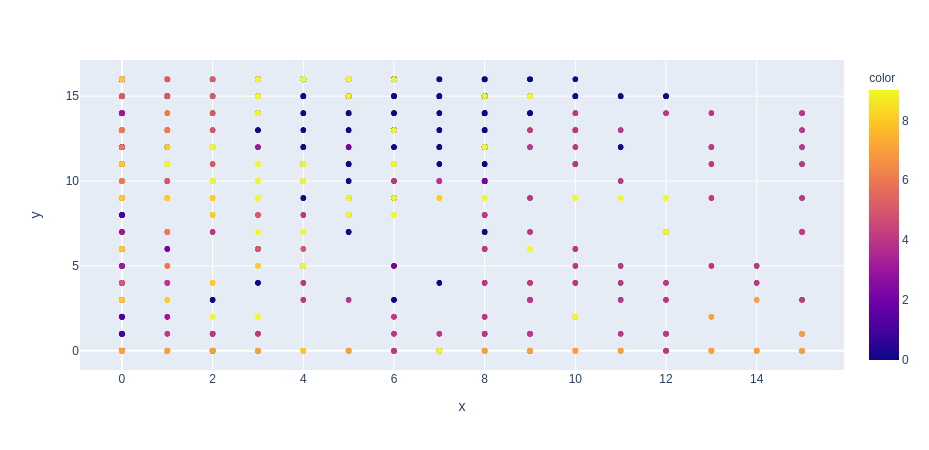

In [121]:
pixel_number_1 = 30
pixel_number_2 = 53


px.scatter(x=X[:,pixel_number_1], y=X[:,pixel_number_2], color=y)

In [122]:
scores = cross_val_score(SVC(kernel='linear'), X, y)

In [124]:
scores.min(), scores.mean(), scores.max()

(0.9194444444444444, 0.9476973073351903, 0.9665738161559888)

In [125]:
model = SVC(kernel='linear')

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [127]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [128]:
y_pred = model.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.90      1.00      0.95        47
           2       1.00      1.00      1.00        42
           3       0.94      1.00      0.97        34
           4       0.94      1.00      0.97        46
           5       0.96      0.96      0.96        50
           6       0.97      1.00      0.99        37
           7       1.00      0.95      0.98        42
           8       0.98      0.86      0.91        49
           9       0.98      0.94      0.96        52

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_test, y_pred)

array([[50,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 48,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 40,  0,  0],
       [ 0,  5,  0,  0,  0,  1,  0,  0, 42,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 49]])

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



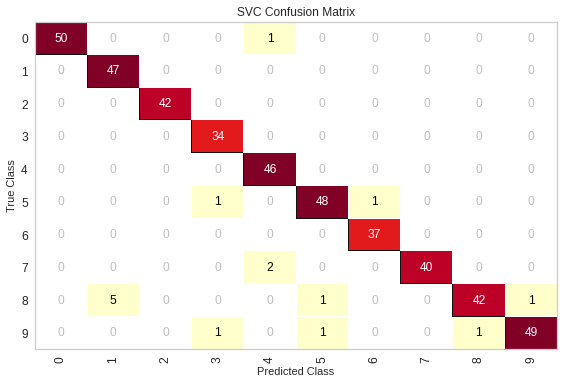

In [143]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### Exercise

1. Give this a go - with a different model (maybe a "bad" model
2. NumPy - can you find the errors and plot the number?

In [147]:
len(np.where(y_test != y_pred)[0])

15

In [148]:
np.where(y_test != y_pred)[0]

array([ 19,  53,  75, 105, 133, 200, 218, 245, 260, 261, 302, 336, 341,
       343, 404])

Expected outcome is: 8
Predicted outcome is: 1


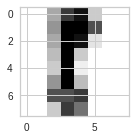

In [146]:
incorrect_index = 75  # Find this number

print(f"Expected outcome is: {y_test[incorrect_index]}")
print(f"Predicted outcome is: {y_pred[incorrect_index]}")

plt.figure(figsize=(2,2))
plt.imshow(X_test[incorrect_index].reshape(8,8));

# Regression

In [150]:
wine.head()

,Cultivar,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [151]:
wine.columns

Index(['Cultivar', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [153]:
cols = ['Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']

In [154]:
X = wine[cols]
y = wine['Alcohol']

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
model = LinearRegression()

In [157]:
scores = cross_val_score(model, X, y)

In [158]:
scores

array([-0.51847929,  0.40456596, -0.73716381, -0.46995099, -0.47213708])

In [161]:
from sklearn.metrics import mean_squared_error

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [163]:
model.fit(X_train, y_train)

LinearRegression()

In [164]:
y_pred = model.predict(X_test)

In [171]:
mean_squared_error(y_test, y_pred)

0.3381564226694799

In [166]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5815121861745288

In [167]:
wine.head()

,Cultivar,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [168]:
residuals = (y_pred - y_test)

In [172]:
residuals

170    0.584250
135    0.399232
52     0.325652
101   -0.317602
13    -1.147237
79    -0.233389
73    -0.179413
1      0.547633
67     0.448368
139   -0.303692
149    0.478290
150   -0.225140
162   -0.081342
138   -0.697041
15     0.636012
142   -0.935566
56    -0.613490
159   -0.391112
42     0.050249
58     0.298875
119    0.223573
176    0.226974
47    -0.276021
5      0.017309
97     0.058715
122   -0.105158
121    1.877172
68    -0.746050
24    -0.398668
23     0.489327
173   -0.187954
75     0.891980
57     0.707513
148   -0.212387
156   -0.680385
158   -1.131996
83    -0.425976
160    0.620979
59    -0.222492
102    0.143726
4     -0.206636
18     0.694997
36     0.125337
109    0.819091
164   -0.445763
Name: Alcohol, dtype: float64

In [169]:
square_residuals = residuals ** 2

In [170]:
np.mean(square_residuals)

0.3381564226694799

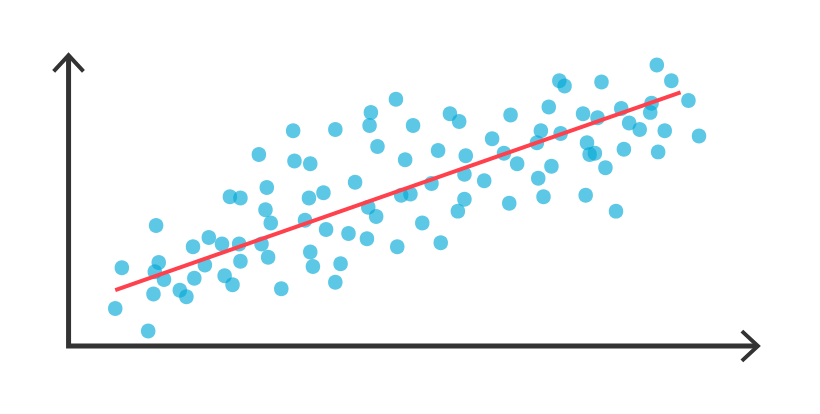

### Exercise

1. Using the workflow, what algorithm should we try next?
2. Give it a go - do we get a better score?

In [173]:
from sklearn.linear_model import Lasso

In [199]:
model_lasso = Lasso(alpha=0.1)

In [200]:
cross_val_score(model_lasso, X, y)

array([-0.44491732,  0.32465466, -0.56301099, -0.04576869, -0.30251459])

In [201]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [202]:
y_pred_lasso = model_lasso.predict(X_test)

In [203]:
mean_squared_error(y_test, y_pred_lasso)

0.2518402030760925

In [204]:
model_lasso.coef_

array([ 0.01471945,  0.        , -0.01846069, -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.1103985 , -0.        ,
        0.        ,  0.0013661 ])

In [205]:
cols

['Malic Acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

# Lunch until 1:20pm

When we are back:
- Piplines - feature transformations
- GridSearchCV - testing different parameters/attributes/hyperparameters
- Feature permutation



### Classification

- Predicting a category
- Use algorithms like SVC, KNearestNeighbors
- Evaluate using accuracy, f1_score, etc
- About being right or wrong

### Regression
- Predicting a continuous value
- Use algorithms like LinearRegression, Lasso, SVR
- Evaluate using $R^2$, mean squared error (MSE), etc
- About being close to the actual answer

### General workflow

Options:
1. Train test split - correct, but only give a single point estimate for your score
2. Cross Fold Validation - also correct, and also gives you more estimates for your score

Can compare different models to choose the best.

# Transformers

In [209]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [210]:
MinMaxScaler?

Init signature: MinMaxScaler(feature_range=(0, 1), *, copy=True)
Docstring:     
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean,
unit variance scaling.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
feature_range : tuple (min, max), default=(0, 1)
    Desired range of transformed data.

copy : bool, default=True
    Set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array).

Attributes
----------
min_ : ndarray of shape (n_features,)
    Per feature adjustment for minimum. Equivalent to
    ``min - X.min

In [212]:
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


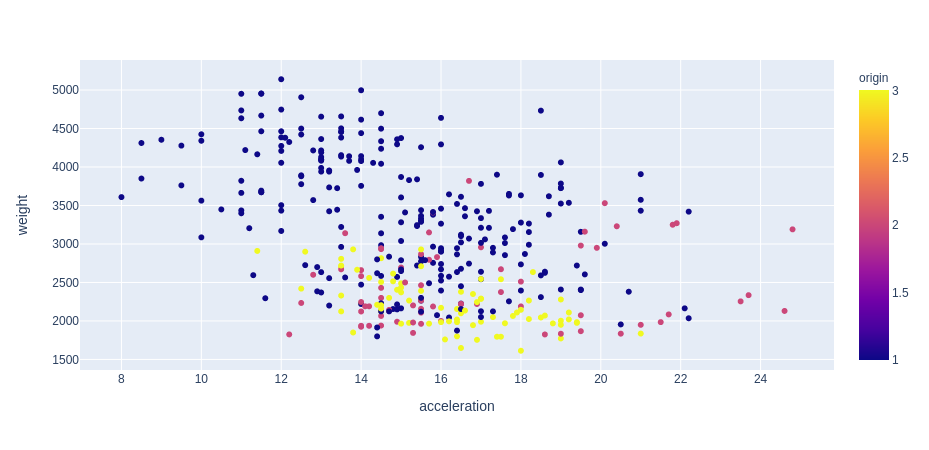

In [213]:
px.scatter(auto, x='acceleration', y='weight', color='origin')

In [214]:
auto.columns

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [220]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', ]           # Removed Unnamed:0, origin and name

In [221]:
X = auto[cols]

In [222]:
y = auto['origin']

In [223]:
transformer = MinMaxScaler()

In [224]:
X_trans = transformer.fit_transform(X)

In [225]:
X_trans

array([[0.2393617 , 1.        , 0.61757106, ..., 0.5361497 , 0.23809524,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.58973632, 0.20833333,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.51686986, 0.17857143,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.19336547, 0.21428571,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.2869294 , 0.63095238,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.31386447, 0.67857143,
        1.        ]])

In [226]:
cross_val_score(KNeighborsClassifier(), X_trans, y)

array([0.72151899, 0.74683544, 0.69230769, 0.71794872, 0.3974359 ])

In [227]:
from sklearn.decomposition import PCA

In [228]:
X_digits = digits.data
y_digits = digits.target

In [234]:
pca = PCA(n_components=3)

In [235]:
X_digits.shape

(1797, 64)

In [236]:
X_digits_reduced = pca.fit_transform(X_digits)

In [237]:
X_digits_reduced.shape

(1797, 3)

In [238]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

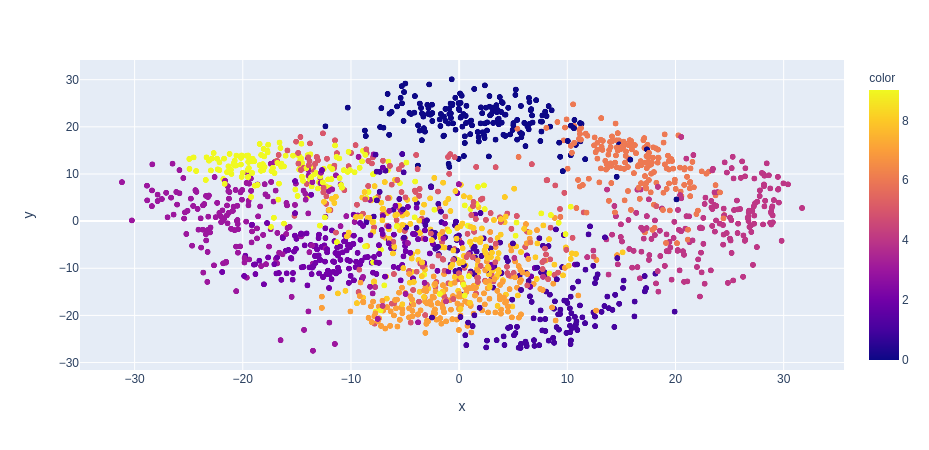

In [240]:
px.scatter(x=X_digits_reduced[:,0], y=X_digits_reduced[:,1], color=y_digits)

In [241]:
pca.components_

array([[ 4.64202932e-17, -1.73094663e-02, -2.23428840e-01,
        -1.35913298e-01, -3.30322995e-02, -9.66340864e-02,
        -8.32944479e-03,  2.26899957e-03, -3.20516487e-04,
        -1.19308908e-01, -2.44451679e-01,  1.48512744e-01,
        -4.67319489e-02, -2.17740742e-01, -1.48136839e-02,
         4.47779429e-03, -4.94136405e-05, -7.95419409e-02,
         8.33951413e-02,  2.15915342e-01, -1.72126803e-01,
        -1.63712097e-01,  2.86444409e-02,  4.23251775e-03,
         9.85488590e-05,  6.42319152e-02,  2.54093315e-01,
        -3.56770989e-02, -2.09462564e-01, -4.31311463e-02,
         5.13118665e-02,  2.13422725e-04,  0.00000000e+00,
         1.59950886e-01,  3.68690774e-01,  1.64406820e-01,
         8.52007907e-02,  3.72982828e-02,  2.15866991e-02,
         0.00000000e+00,  1.28865587e-03,  1.06945288e-01,
         3.03067458e-01,  2.47813033e-01,  2.09637299e-01,
         1.22325180e-02, -3.69458476e-02,  1.61485041e-03,
         6.93023558e-04, -8.35144263e-03, -5.58598995e-0

In [242]:
X_digits_recovered = pca.inverse_transform(X_digits_reduced)

2


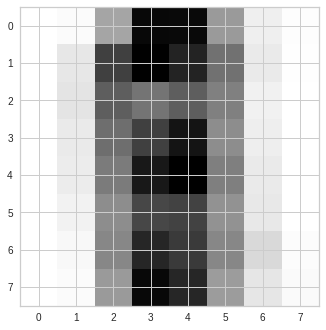

In [254]:
index = 50

print(y_digits[index])
image = X_digits_recovered[index].reshape(8, 8)
plt.imshow(image, cmap='Greys')

Original


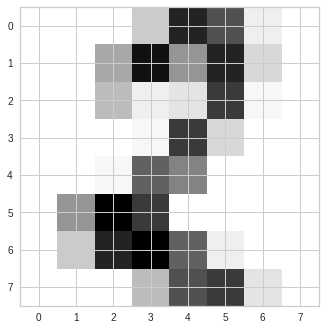

In [257]:
print("Original")
image = X_digits[index].reshape(8, 8)
plt.imshow(image, cmap='Greys');

# Pipeline

In [258]:
from sklearn.pipeline import make_pipeline

In [259]:
my_pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier())

In [260]:
my_pipeline

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [261]:
cross_val_score(my_pipeline, X, y)

array([0.67088608, 0.74683544, 0.69230769, 0.71794872, 0.38461538])

# Exercise 

Create a pipeline for the following steps:
1. PCA analysis, reducing to 4 features
2. SGDClassifier

Run this model on the digits dataset, using cross_val_score.

In [263]:
from sklearn.linear_model import SGDClassifier

An "estimator" is scikit-learn's term for "any classifier, regression or clustering algorithm". Basically anything with a predict function.

In [269]:
my_pipeline = make_pipeline(PCA(n_components=30), SGDClassifier())

In [270]:
cross_val_score(my_pipeline, X_digits, y_digits)

array([0.91388889, 0.87222222, 0.91643454, 0.94150418, 0.86908078])

# Grid Search

In [272]:
from sklearn.model_selection import GridSearchCV

In [275]:
my_params_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10],
    'shrinking': [False, True],
}

grid = GridSearchCV(SVC(), my_params_grid)


In [277]:
grid.fit(X, y)  # Does cross fold validation internally

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10],
                         'shrinking': [False, True]})

In [278]:
grid.best_params_

{'C': 10, 'shrinking': False}

In [279]:
grid.best_score_

0.6809477442388834

In [280]:
grid.cv_results_

{'mean_fit_time': array([0.0063375 , 0.00595956, 0.0063899 , 0.00599151, 0.00566192,
        0.00539742, 0.00532107, 0.0053411 , 0.00543895, 0.00567799]),
 'std_fit_time': array([4.12576214e-04, 2.11490176e-04, 3.04044115e-04, 1.05652657e-03,
        3.30306975e-04, 9.47950112e-05, 1.00355294e-04, 1.88784606e-04,
        8.46024691e-05, 4.08114514e-04]),
 'mean_score_time': array([0.00262241, 0.00271268, 0.00273118, 0.00259147, 0.00224109,
        0.0021853 , 0.0022264 , 0.00226517, 0.00233321, 0.00223269]),
 'std_score_time': array([1.67377070e-04, 6.51600027e-05, 1.43651624e-04, 6.21960745e-04,
        7.98213724e-05, 1.79473297e-05, 4.74246618e-05, 8.57560045e-05,
        2.61494880e-04, 6.70651757e-05]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1.0, 1.0, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_shrinking': masked_array(

In [281]:
my_pipeline.named_steps

{'pca': PCA(n_components=30), 'sgdclassifier': SGDClassifier()}

In [283]:
SGDClassifier?

Init signature:
SGDClassifier(
    loss='hinge',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
    average=False,
)
Docstring:     
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.



In [284]:
my_pipeline_grid = {
    'pca__n_components': [2, 5, 10, 25, 40],
    'sgdclassifier__loss': ['hinge', 'log']
}

In [289]:
grid_p = GridSearchCV(my_pipeline, my_pipeline_grid, scoring=f1_scorer)

In [290]:
grid_p.fit(X_digits, y_digits)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=30)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': [2, 5, 10, 25, 40],
                         'sgdclassifier__loss': ['hinge', 'log']},
             scoring=make_scorer(f1_score, average=macro))

In [291]:
grid_p.best_params_

{'pca__n_components': 25, 'sgdclassifier__loss': 'log'}

In [292]:
grid_p.best_score_

0.9145501744291005

### Exercise

Predict auto (origin column) using a pipeline with two steps:
1. MinMaxScalar
2. KNearestNeighbor


Try different values for `n_neighbors`. Note there are no really useful parameters for MinMaxScalar, so you don't need to add it to your params grid.

### Extended Exercise

Try add a step using `sklearn.preprocessing.Binarizer`, after doing the MinMaxScalar step and before KNN.
Set the threshold to different values and test the results.


In [302]:
my_pipeline_grid = {
    'kneighborsclassifier__n_neighbors': [2, 5, 10]
}

In [303]:
X_digits = digits.data
y_digits = digits.target

In [304]:
my_pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier())

In [305]:
my_pipeline.named_steps

{'minmaxscaler': MinMaxScaler(),
 'kneighborsclassifier': KNeighborsClassifier()}

In [306]:
grid_p = GridSearchCV(my_pipeline, my_pipeline_grid, scoring=f1_scorer)

In [307]:
grid_p.fit(X_digits, y_digits)

GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [2, 5, 10]},
             scoring=make_scorer(f1_score, average=macro))

In [308]:
grid_p.best_score_

0.9640720727036614

In [309]:
grid_p.best_params_

{'kneighborsclassifier__n_neighbors': 2}

In [310]:
from sklearn.preprocessing import Binarizer

In [312]:
my_pipeline_grid = {
    'kneighborsclassifier__n_neighbors': [2, 5, 10],
    'binarizer__threshold': [0.2, 0.5, 0.8]
}
my_pipeline = make_pipeline(MinMaxScaler(), Binarizer(), KNeighborsClassifier())
grid_p = GridSearchCV(my_pipeline, my_pipeline_grid, scoring=f1_scorer)
grid_p.fit(X_digits, y_digits)

GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('binarizer', Binarizer()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'binarizer__threshold': [0.2, 0.5, 0.8],
                         'kneighborsclassifier__n_neighbors': [2, 5, 10]},
             scoring=make_scorer(f1_score, average=macro))

In [313]:
grid_p.best_score_

0.9017957002856598

In [314]:
grid_p.best_params_

{'binarizer__threshold': 0.5, 'kneighborsclassifier__n_neighbors': 5}

In [315]:
grid_p = GridSearchCV(my_pipeline, my_pipeline_grid, scoring=f1_scorer, n_jobs=-2)

In [316]:
grid_p.fit(X_digits, y_digits)

GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('binarizer', Binarizer()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-2,
             param_grid={'binarizer__threshold': [0.2, 0.5, 0.8],
                         'kneighborsclassifier__n_neighbors': [2, 5, 10]},
             scoring=make_scorer(f1_score, average=macro))

In [317]:
grid_p.best_score_

0.9017957002856598

In [318]:
grid_p.best_params_

{'binarizer__threshold': 0.5, 'kneighborsclassifier__n_neighbors': 5}

# Text Mining

In [320]:
# Don't type this

from sklearn.feature_extraction.text import CountVectorizer


documents = [
    "the cat in the hat sat on the mat",
    "the hat on the mat belonged to the cat",
    "the hat sat on the mat"
]


In [321]:
counter = CountVectorizer()

In [322]:
counter.fit(documents)

CountVectorizer()

In [324]:
counter.get_feature_names()

['belonged', 'cat', 'hat', 'in', 'mat', 'on', 'sat', 'the', 'to']

In [323]:
X = counter.transform(documents).todense()

In [325]:
X

matrix([[0, 1, 1, 1, 1, 1, 1, 3, 0],
        [1, 1, 1, 0, 1, 1, 0, 3, 1],
        [0, 0, 1, 0, 1, 1, 1, 2, 0]])

In [326]:
# Type this (if you want)

In [327]:
from sklearn.datasets import fetch_20newsgroups

In [328]:
news = fetch_20newsgroups()

In [330]:
documents = news.data
targets = news.target

In [332]:
print(news.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [334]:
print(documents[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [335]:
targets[0]

7

In [336]:
group_one = 7
group_two = 1

In [370]:
news.target_names[group_one]

'rec.autos'

In [371]:
news.target_names[group_two]

'comp.graphics'

In [358]:
import pandas as pd
news_df = pd.DataFrame({'documents': documents, 'newsgroup': targets})
mask = news_df['newsgroup'].isin([group_one, group_two])
news_sample = news_df[mask]
documents_sample = news_sample['documents']
y_sample = news_sample['newsgroup']

In [359]:
# from sklearn.naive_bayes import GaussianNB

In [362]:
text_pipeline = make_pipeline(CountVectorizer(), SGDClassifier())

scores = cross_val_score(text_pipeline, documents_sample, y_sample)

scores.mean()

In [365]:
scores

array([0.96610169, 0.97033898, 0.96186441, 0.96170213, 0.97446809])

# Break until 15:30pm

In [367]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Exercise

Create a pipeline using TfidfVectorizer instead of CountVectorizer. Does this improve your results?


### Extended Exercise

What does the ngram_range parameter do? Try a different value for this and compare the results.

In [369]:
text_pipeline = make_pipeline(TfidfVectorizer(), SGDClassifier())

scores = cross_val_score(text_pipeline, documents_sample, y_sample)

scores.mean()

0.9847169130905156

# Persisting models to disk

Pick the model you like the best, and then save to disk:

In [373]:
text_pipeline.fit(documents_sample, y_sample)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('sgdclassifier', SGDClassifier())])

In [374]:
import joblib

In [376]:
joblib.dump(text_pipeline, "my_model.pkl")

['my_model.pkl']

In [377]:
%pwd

'/home/shared/532-20python-20for-20predictive-20data-20analytics'

In [378]:
my_other_pipeline = joblib.load("my_model.pkl")

In [379]:
my_other_pipeline.predict(["I'd like to design a poster"])

array([1])

In [380]:
news.target_names[1]

'comp.graphics'

### Exercise

Write a function that accepts a string as output, and returns the name of the predicted newsgroup as output.

In [382]:
def convert_height(feet, inches):
    total_inches = feet * 12 + inches
    total_cm = total_inches * 2.54
    return total_cm

In [383]:
convert_height(6, 3)

190.5

In [384]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [389]:
def get_newsgroup_name(document):
    # use your pipeline here to get the prediction
    prediction = my_other_pipeline.predict([document])[0]
    # convert the predicted number (1 or 7 at the moment) to a newsgroup name
    newsgroup_name = news.target_names[prediction]
    # return newsgroup name
    return newsgroup_name
    

In [390]:
get_newsgroup_name("I'd like to design a poster")  # Should return "comp.graphics"

'comp.graphics'

In [391]:
get_newsgroup_name("I'd like to buy a car")

'rec.autos'

In [392]:
%%writefile predict_newsgroup.py
import joblib

news_target_names = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

my_other_pipeline = joblib.load("my_model.pkl")


def get_newsgroup_name(document):
    # use your pipeline here to get the prediction
    prediction = my_other_pipeline.predict([document])[0]
    # convert the predicted number (1 or 7 at the moment) to a newsgroup name
    newsgroup_name = news_target_names[prediction]                                 # CHANGED
    # return newsgroup name
    return newsgroup_name


Writing predict_newsgroup.py


In [393]:
import predict_newsgroup

In [394]:
predict_newsgroup.get_newsgroup_name("Cars are cool")

'rec.autos'

In [398]:
%%writefile my_dashboard.py


import streamlit as st
import predict_newsgroup


st.write("# Newsgroup Prediction")


Text = st.text_input("Enter document:")
newsgroup = predict_newsgroup.get_newsgroup_name(Text)
st.write(f"Predicted Newsgroup is: {newsgroup}")



Overwriting my_dashboard.py


### Exercise

Create a dashboard that allows the user to enter some text, run that in the model (using your new module) and writes out the prediction.

Text Area: `st.text_area`

Docs: https://docs.streamlit.io/library/api-reference/widgets/st.text_area

https://hub.pythoncharmers.com/hub/user-redirect/proxy/8501/

In [399]:
from yellowbrick.model_selection import LearningCurve

curve = LearningCurve(my_other_pipeline)

curve.fit(documents, targets)


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



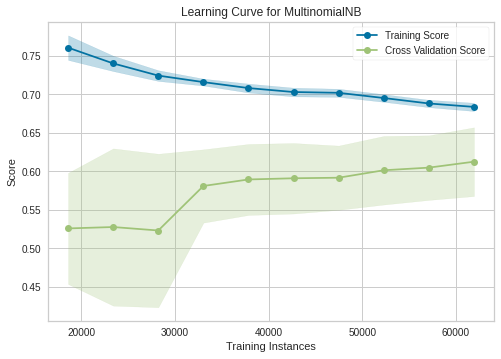

In [403]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Load a classification dataset
X, y = load_game()

# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



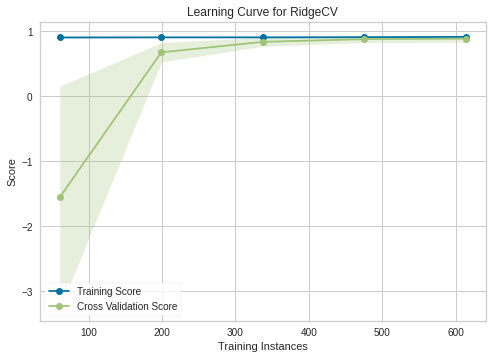

In [404]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
X, y = load_energy()

# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure